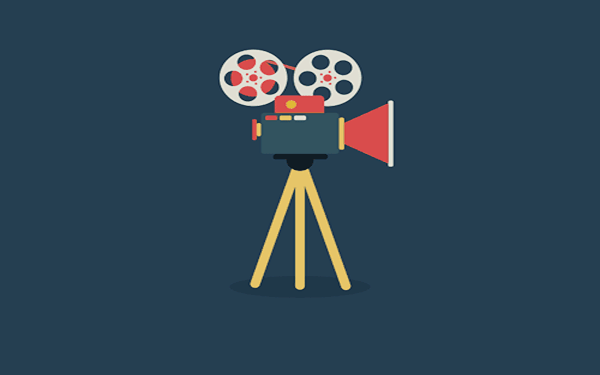

# Microsoft's Cinematic Exploration: A Box Office Analysis
**Author:** Rhoda Musyoki
***

## Overview

Microsoft is venturing into the world of movie production and aims to establish a successful movie studio. This data analysis project is done to gain some insights on the industry and involves analyzing data on box office performance, including factors such as genre, production budget, ROI, release day/ month and viewer ratings. Various data analysis methods were employed to uncover insights from the data. The results reveal trends and patterns in successful movies which allows Microsoft to make data-driven decisions on the types of movies to produce. Recommendations are provided to guide the studio in creating content that is likely to be well-received by audiences and financially successful in the competitive film industry.

## Business Problem

Microsoft lacks prior experience in the movie production industry and needs to make informed decisions about the types of films to create in order to achieve success at the box office.

***
### Questions to consider:
#### 1. What genre yields the highest return on investment (ROI) in the context of box office performance?
#### 2. What is the best day and month for movie release to maximize box office revenue and audience reception?
#### 3. Is there a statistically significant correlation between production budget and worldwide gross revenue for movies?
***

## Data Understanding

The data sources for this analysis include IMDb's title and ratings data, Box Office Mojo's movie gross data, and The Numbers' movie budgets data.

***
Datasets Used:

1. imdb.title.basics: This dataset contains information about movie titles, including genres, release year and runtime. It  will be used to understand the genres and general characteristics of the movies in the analysis
***  

2. imdb.title.ratings: This dataset provides movie ratings for an assessment of audience reception. These ratings help in evaluating the success of movies
***  

3. bom.movie_gross: This dataset includes information on the domestic and foreign box office gross revenue for movies
***

4. tn.movie_budgets: This dataset provides data on the production budgets and worldwide gross revenue of movies for the 
   analysis of the relationship between budgets and revenue
***

In [10]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
# Load datasets

df1 = pd.read_csv('C:/Users/nrhom/Documents/DSPT/dsc-phase1-project/Data/title.basics.csv')
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
df2 = pd.read_csv('C:/Users/nrhom/Documents/DSPT/dsc-phase1-project/Data/title.ratings.csv')
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
# merge df1 & df2 

combined_df = pd.merge(df1, df2, on = 'tconst')
combined_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [14]:
# Load bom.movie_gross dataset

df3 = pd.read_csv('C:/Users/nrhom/Documents/DSPT/dsc-phase1-project/Data/bom.movie_gross.csv')
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Preparation

***
* Some columns were dropped to manage the size of the data being analyzed
* Entries with missing values were dropped. The analyses showed that they were not significantly high
* Duplicate entries were also dropped to increase the accuracy of our analysis
***

In [15]:
# Rename title column in df3 to match combined_df1's primary title

df3.rename(columns = {'title':'primary_title'}, inplace = True)
df3.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [16]:
# review dataset features

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
# Drop entries with null values at foreign gross column

df3.dropna(subset = ['foreign_gross'], inplace = True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


In [18]:
# Convert foreign gross column entries to int64 to allow for manipulation

df3['foreign_gross'] = df3['foreign_gross'].str.replace(',', '')
df3['foreign_gross'] = df3['foreign_gross'].astype('float')
df3['foreign_gross'] = df3['foreign_gross'].astype('int64')

In [19]:
# Convert domestic gross column entries to int64 to allow for manipulation

df3['domestic_gross'] = df3['domestic_gross'].astype('Int64')

In [20]:
# confirm the changes

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   primary_title   2037 non-null   object
 1   studio          2033 non-null   object
 2   domestic_gross  2009 non-null   Int64 
 3   foreign_gross   2037 non-null   int64 
 4   year            2037 non-null   int64 
dtypes: Int64(1), int64(2), object(2)
memory usage: 97.5+ KB


In [21]:
# Add a column to show worldwide gross and confirm change

df3['worldwide_gross'] = (df3['domestic_gross'] + df3['foreign_gross'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   primary_title    2037 non-null   object
 1   studio           2033 non-null   object
 2   domestic_gross   2009 non-null   Int64 
 3   foreign_gross    2037 non-null   int64 
 4   year             2037 non-null   int64 
 5   worldwide_gross  2009 non-null   Int64 
dtypes: Int64(2), int64(2), object(2)
memory usage: 115.4+ KB


In [22]:
# join datasets combined_df and df3 then preview new dataset, combined_df2

combined_df1 = pd.merge(combined_df, df3, on = 'primary_title')
combined_df1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000,8000000,2012,8744000
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000,8000000,2012,8744000
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000,8000000,2012,8744000
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000,129900000,2013,188100000
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000,26900000,2014,53200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000,542100000,2018,544100000
1828,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000,35300000,2018,79400000
1829,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000,1800000,2018,33500000
1830,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000,82100000,2018,82847000


In [23]:
# drop columns that will not be used to answer our questions for our analysis

combined_df1 = combined_df1.drop(['original_title', 'start_year', 'runtime_minutes', 'studio', 'domestic_gross', 'foreign_gross'], axis = 1)
combined_df1

,tconst,primary_title,genres,averagerating,numvotes,year,worldwide_gross
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,2012,8744000
1,tt4339118,On the Road,Drama,6.0,6,2012,8744000
2,tt5647250,On the Road,Drama,5.7,127,2012,8744000
3,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,2013,188100000
4,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,2014,53200000
...,...,...,...,...,...,...,...
1827,tt7752454,Detective Chinatown 2,"Action,Comedy,Mystery",6.1,1250,2018,544100000
1828,tt7784604,Hereditary,"Drama,Horror,Mystery",7.3,151571,2018,79400000
1829,tt8097306,Nobody's Fool,"Comedy,Drama,Romance",4.6,3618,2018,33500000
1830,tt8404272,How Long Will I Love U,Romance,6.5,607,2018,82847000


In [24]:
# check for missing values

missing_values = combined_df1.isna().sum()
missing_values

tconst              0
primary_title       0
genres              7
averagerating       0
numvotes            0
year                0
worldwide_gross    22
dtype: int64

In [25]:
# find out the proportion of the missing values in relation to the entire dataset to determine treatment

missing_percentage = (combined_df1.isna().mean() * 100)
missing_percentage

tconst             0.000000
primary_title      0.000000
genres             0.382096
averagerating      0.000000
numvotes           0.000000
year               0.000000
worldwide_gross    1.200873
dtype: float64

In [26]:
# the missing values make up less than 3% of our dataset
# drop the missing values

combined_df1.dropna(subset = ['worldwide_gross', 'genres'], inplace = True)
combined_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1803 entries, 0 to 1831
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1803 non-null   object 
 1   primary_title    1803 non-null   object 
 2   genres           1803 non-null   object 
 3   averagerating    1803 non-null   float64
 4   numvotes         1803 non-null   int64  
 5   year             1803 non-null   int64  
 6   worldwide_gross  1803 non-null   Int64  
dtypes: Int64(1), float64(1), int64(2), object(3)
memory usage: 114.4+ KB


In [27]:
# load the tn.movie_budgets dataset to explore the budget aspect of the movies which will later allow us to compute the ROI

df4 = pd.read_csv('C:/Users/nrhom/Documents/DSPT/dsc-phase1-project/Data/tn.movie_budgets.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
# column of interest, production_budget is in string format, changing to int to allow manipulation

df4['production_budget'] = df4['production_budget'].str.replace('[\$,]','', regex = True).astype(np.int64)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.2+ KB


In [29]:
# columns of interest are release date, movie and production budget
# worldwide gross entries are in the dataset we want to join with and domestic gross is part of worldwide gross
# drop the id, domestic gross and worldwwide gross columns

df4.drop(columns = ['id', 'domestic_gross', 'worldwide_gross'], inplace = True)
df4.head()

,release_date,movie,production_budget
0,"Dec 18, 2009",Avatar,425000000
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000
2,"Jun 7, 2019",Dark Phoenix,350000000
3,"May 1, 2015",Avengers: Age of Ultron,330600000
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000


In [30]:
# rename movie column to primary title to allow joining of the datasets

df4.rename(columns = {'movie':'primary_title'}, inplace = True)
df4.head()

,release_date,primary_title,production_budget
0,"Dec 18, 2009",Avatar,425000000
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000
2,"Jun 7, 2019",Dark Phoenix,350000000
3,"May 1, 2015",Avengers: Age of Ultron,330600000
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000


In [31]:
# check for missing values in dataset

missing_values1 = df4.isna().sum()
missing_values1

release_date         0
primary_title        0
production_budget    0
dtype: int64

In [32]:
# check for duplicates in dataset

duplicates_df4 = df4[df4.duplicated(subset = ['primary_title'], keep = False)]
duplicates_df4.sort_values(by = 'primary_title')

,release_date,primary_title,production_budget
4270,"Dec 23, 1954","20,000 Leagues Under the Sea",5000000
5614,"Dec 24, 1916","20,000 Leagues Under the Sea",200000
1648,"Apr 30, 2010",A Nightmare on Elm Street,35000000
5016,"Nov 9, 1984",A Nightmare on Elm Street,1800000
2032,"Nov 11, 1992",Aladdin,28000000
...,...,...,...
3403,"Apr 21, 2017",Unforgettable,12000000
1420,"Feb 18, 2011",Unknown,40000000
4583,"Nov 3, 2006",Unknown,3700000
2313,"Sep 16, 2005",Venom,25000000


In [33]:
# a quick overview of the duplicate primary_titles alongside release dates shows that the movies are different
# adding the release date parameter to check for duplicates 

duplicates_df4 = df4[df4.duplicated(subset = ['release_date' ,'primary_title'], keep = False)]
duplicates_df4.sort_values(by = 'primary_title')

,release_date,primary_title,production_budget


In [34]:
# joining df4 and condined_df1 dataset

combined_df2 = pd.merge(combined_df1, df4, on = 'primary_title')
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1207 non-null   object 
 1   primary_title      1207 non-null   object 
 2   genres             1207 non-null   object 
 3   averagerating      1207 non-null   float64
 4   numvotes           1207 non-null   int64  
 5   year               1207 non-null   int64  
 6   worldwide_gross    1207 non-null   Int64  
 7   release_date       1207 non-null   object 
 8   production_budget  1207 non-null   int64  
dtypes: Int64(1), float64(1), int64(3), object(4)
memory usage: 86.2+ KB


In [35]:
# combined_df2 dataset overview

combined_df2.head(10)

,tconst,primary_title,genres,averagerating,numvotes,year,worldwide_gross,release_date,production_budget
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,2012,8744000,"Mar 22, 2013",25000000
1,tt4339118,On the Road,Drama,6.0,6,2012,8744000,"Mar 22, 2013",25000000
2,tt5647250,On the Road,Drama,5.7,127,2012,8744000,"Mar 22, 2013",25000000
3,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,2013,188100000,"Dec 25, 2013",91000000
4,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,2014,53200000,"Sep 19, 2014",28000000
5,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,2015,652301019,"Jun 12, 2015",215000000
6,tt0376136,The Rum Diary,"Comedy,Drama",6.2,94787,2011,23900000,"Oct 28, 2011",45000000
7,tt0383010,The Three Stooges,"Comedy,Family",5.1,28570,2012,54800000,"Apr 13, 2012",30000000
8,tt0398286,Tangled,"Adventure,Animation,Comedy",7.8,366366,2010,591800000,"Nov 24, 2010",260000000
9,tt0401729,John Carter,"Action,Adventure,Sci-Fi",6.6,241792,2012,284200000,"Mar 9, 2012",275000000


In [36]:
# Check for duplicates using primary title, production budget and release date columns

duplicates_C4 = combined_df2[combined_df2.duplicated(subset= ['primary_title', 'release_date', 'production_budget'], keep=False)]
duplicates_C4

,tconst,primary_title,genres,averagerating,numvotes,year,worldwide_gross,release_date,production_budget
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,2012,8744000,"Mar 22, 2013",25000000
1,tt4339118,On the Road,Drama,6.0,6,2012,8744000,"Mar 22, 2013",25000000
2,tt5647250,On the Road,Drama,5.7,127,2012,8744000,"Mar 22, 2013",25000000
18,tt0451279,Wonder Woman,"Action,Adventure,Fantasy",7.5,487527,2017,821900000,"Jun 2, 2017",150000000
19,tt4028068,Wonder Woman,Sci-Fi,4.2,20,2017,821900000,"Jun 2, 2017",150000000
...,...,...,...,...,...,...,...,...,...
1174,tt5897302,Slender Man,"Adventure,Comedy,Horror",5.9,32,2018,51800000,"Aug 10, 2018",10000000
1188,tt6347308,A Quiet Place,Documentary,6.6,18,2018,340900000,"Apr 6, 2018",17000000
1189,tt6644200,A Quiet Place,"Drama,Horror,Sci-Fi",7.6,305031,2018,340900000,"Apr 6, 2018",17000000
1192,tt6499752,Upgrade,"Action,Sci-Fi,Thriller",7.6,104978,2018,14400000,"Jun 1, 2018",3000000


In [37]:
# an overview of the dataset indicates varying numvote entries
# retain the entries with the highest recorded numvotes

duplicates_C4 = duplicates_C4.sort_values(by='numvotes', ascending=False)
duplicates_C4

,tconst,primary_title,genres,averagerating,numvotes,year,worldwide_gross,release_date,production_budget
605,tt1663202,The Revenant,"Action,Adventure,Biography",8.0,621193,2015,532900000,"Dec 25, 2015",135000000
613,tt1670345,Now You See Me,"Crime,Mystery,Thriller",7.3,553156,2013,351700000,"May 31, 2013",75000000
582,tt2096673,Inside Out,"Adventure,Animation,Comedy",8.2,536181,2015,857600000,"Jun 19, 2015",175000000
314,tt2294629,Frozen,"Adventure,Animation,Comedy",7.5,516998,2013,1276400000,"Nov 22, 2013",150000000
235,tt1219289,Limitless,"Mystery,Sci-Fi,Thriller",7.4,492490,2011,161800000,"Mar 18, 2011",27000000
...,...,...,...,...,...,...,...,...,...
476,tt1783264,Elysium,Drama,6.0,6,2013,286200000,"Aug 9, 2013",120000000
431,tt4540326,Buried,Thriller,6.0,5,2010,19100000,"Sep 24, 2010",1987650
745,tt4741754,The Call,Thriller,6.6,5,2013,68600000,"Mar 15, 2013",12800000
1056,tt3566920,The Other Side of the Door,Drama,3.8,5,2016,14300000,"Mar 4, 2016",5000000


In [38]:
# removing the duplicates from combined_df2 dataset based on primary_title, production_budget and release_date columns while keeping the rows with the highest numvotes

combined_df2 = combined_df2.sort_values(by='numvotes', ascending=False)
combined_df2 = combined_df2.drop_duplicates(subset=['primary_title', 'release_date', 'production_budget'], keep='first')

In [39]:
combined_df2.sort_values(by = 'primary_title')

,tconst,primary_title,genres,averagerating,numvotes,year,worldwide_gross,release_date,production_budget
206,tt1179933,10 Cloverfield Lane,"Drama,Horror,Mystery",7.2,260383,2016,110200000,"Mar 11, 2016",5000000
383,tt1413492,12 Strong,"Action,Drama,History",6.6,50155,2018,67400000,"Jan 19, 2018",35000000
799,tt2024544,12 Years a Slave,"Biography,Drama,History",8.1,577301,2013,187800000,"Oct 18, 2013",20000000
484,tt1542344,127 Hours,"Adventure,Biography,Drama",7.6,323949,2010,60700000,"Nov 5, 2010",18000000
278,tt1272878,2 Guns,"Action,Comedy,Crime",6.7,182025,2013,131900000,"Aug 2, 2013",61000000
...,...,...,...,...,...,...,...,...,...
257,tt1240982,Your Highness,"Adventure,Comedy,Fantasy",5.5,92940,2011,24900000,"Apr 8, 2011",50000000
673,tt1790885,Zero Dark Thirty,"Drama,Thriller",7.4,251072,2012,132800000,"Dec 19, 2012",52500000
240,tt1222817,Zookeeper,"Comedy,Family,Romance",5.2,52396,2011,169900000,"Jul 8, 2011",80000000
549,tt1608290,Zoolander 2,Comedy,4.7,59914,2016,56700000,"Feb 12, 2016",50000000


In [40]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 344 to 956
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1009 non-null   object 
 1   primary_title      1009 non-null   object 
 2   genres             1009 non-null   object 
 3   averagerating      1009 non-null   float64
 4   numvotes           1009 non-null   int64  
 5   year               1009 non-null   int64  
 6   worldwide_gross    1009 non-null   Int64  
 7   release_date       1009 non-null   object 
 8   production_budget  1009 non-null   int64  
dtypes: Int64(1), float64(1), int64(3), object(4)
memory usage: 79.8+ KB


In [41]:
# resetting the index

combined_df2.reset_index(drop=True, inplace = True)
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1009 non-null   object 
 1   primary_title      1009 non-null   object 
 2   genres             1009 non-null   object 
 3   averagerating      1009 non-null   float64
 4   numvotes           1009 non-null   int64  
 5   year               1009 non-null   int64  
 6   worldwide_gross    1009 non-null   Int64  
 7   release_date       1009 non-null   object 
 8   production_budget  1009 non-null   int64  
dtypes: Int64(1), float64(1), int64(3), object(4)
memory usage: 72.1+ KB


In [42]:
# drop some columns not necessary for our analysis

combined_df2.drop(columns = ['tconst', 'year'], inplace = True)
combined_df2

,primary_title,genres,averagerating,numvotes,worldwide_gross,release_date,production_budget
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,828300000,"Jul 16, 2010",160000000
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769,1084900000,"Jul 20, 2012",275000000
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334,677400000,"Nov 5, 2014",165000000
3,Django Unchained,"Drama,Western",8.4,1211405,425400000,"Dec 25, 2012",100000000
4,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358,392000000,"Dec 25, 2013",100000000
...,...,...,...,...,...,...,...
1004,Sea Rex 3D: Journey to a Prehistoric World,Documentary,6.9,364,16000000,"May 28, 2010",5000000
1005,The Joneses,"Comedy,Drama",6.9,87,7000000,"Apr 16, 2010",10000000
1006,Chloe,"Drama,Music,Romance",6.9,34,11700000,"Mar 26, 2010",13000000
1007,Red,Drama,8.1,26,199000000,"Oct 15, 2010",60000000


In [43]:
# convert the release_date column to datetime

combined_df2['release_date'] = pd.to_datetime(combined_df2['release_date'])

In [44]:
# extract day of the week & month in words and year

combined_df2['release_day'] = combined_df2['release_date'].dt.strftime('%A')
combined_df2['month'] = combined_df2['release_date'].dt.strftime('%B')
combined_df2['year'] = combined_df2['release_date'].dt.year

In [45]:
combined_df2

,primary_title,genres,averagerating,numvotes,worldwide_gross,release_date,production_budget,release_day,month,year
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,828300000,2010-07-16,160000000,Friday,July,2010
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769,1084900000,2012-07-20,275000000,Friday,July,2012
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334,677400000,2014-11-05,165000000,Wednesday,November,2014
3,Django Unchained,"Drama,Western",8.4,1211405,425400000,2012-12-25,100000000,Tuesday,December,2012
4,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358,392000000,2013-12-25,100000000,Wednesday,December,2013
...,...,...,...,...,...,...,...,...,...,...
1004,Sea Rex 3D: Journey to a Prehistoric World,Documentary,6.9,364,16000000,2010-05-28,5000000,Friday,May,2010
1005,The Joneses,"Comedy,Drama",6.9,87,7000000,2010-04-16,10000000,Friday,April,2010
1006,Chloe,"Drama,Music,Romance",6.9,34,11700000,2010-03-26,13000000,Friday,March,2010
1007,Red,Drama,8.1,26,199000000,2010-10-15,60000000,Friday,October,2010


In [46]:
# drop some columns not necessary for our analysis

combined_df2.drop(columns = ['release_date'], inplace = True)
combined_df2

,primary_title,genres,averagerating,numvotes,worldwide_gross,production_budget,release_day,month,year
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,828300000,160000000,Friday,July,2010
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769,1084900000,275000000,Friday,July,2012
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334,677400000,165000000,Wednesday,November,2014
3,Django Unchained,"Drama,Western",8.4,1211405,425400000,100000000,Tuesday,December,2012
4,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358,392000000,100000000,Wednesday,December,2013
...,...,...,...,...,...,...,...,...,...
1004,Sea Rex 3D: Journey to a Prehistoric World,Documentary,6.9,364,16000000,5000000,Friday,May,2010
1005,The Joneses,"Comedy,Drama",6.9,87,7000000,10000000,Friday,April,2010
1006,Chloe,"Drama,Music,Romance",6.9,34,11700000,13000000,Friday,March,2010
1007,Red,Drama,8.1,26,199000000,60000000,Friday,October,2010


In [47]:
# Rearrange the columns for better flow

preferred_order = ['primary_title', 'genres', 'production_budget', 'worldwide_gross', 'averagerating', 'numvotes', 'release_day', 'month', 'year']
combined_df2 = combined_df2[preferred_order]
combined_df2

,primary_title,genres,production_budget,worldwide_gross,averagerating,numvotes,release_day,month,year
0,Inception,"Action,Adventure,Sci-Fi",160000000,828300000,8.8,1841066,Friday,July,2010
1,The Dark Knight Rises,"Action,Thriller",275000000,1084900000,8.4,1387769,Friday,July,2012
2,Interstellar,"Adventure,Drama,Sci-Fi",165000000,677400000,8.6,1299334,Wednesday,November,2014
3,Django Unchained,"Drama,Western",100000000,425400000,8.4,1211405,Tuesday,December,2012
4,The Wolf of Wall Street,"Biography,Crime,Drama",100000000,392000000,8.2,1035358,Wednesday,December,2013
...,...,...,...,...,...,...,...,...,...
1004,Sea Rex 3D: Journey to a Prehistoric World,Documentary,5000000,16000000,6.9,364,Friday,May,2010
1005,The Joneses,"Comedy,Drama",10000000,7000000,6.9,87,Friday,April,2010
1006,Chloe,"Drama,Music,Romance",13000000,11700000,6.9,34,Friday,March,2010
1007,Red,Drama,60000000,199000000,8.1,26,Friday,October,2010


In [48]:
# Add a new column to indicate return on investment, ROI

combined_df2['ROI'] = 0

combined_df2.loc[:, 'ROI'] = ((combined_df2['worldwide_gross'] - combined_df2['production_budget']) / combined_df2['production_budget']) * 100
combined_df2

C:\Users\nrhom\AppData\Local\Temp\ipykernel_27128\2759457127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df2['ROI'] = 0


,primary_title,genres,production_budget,worldwide_gross,averagerating,numvotes,release_day,month,year,ROI
0,Inception,"Action,Adventure,Sci-Fi",160000000,828300000,8.8,1841066,Friday,July,2010,417.6875
1,The Dark Knight Rises,"Action,Thriller",275000000,1084900000,8.4,1387769,Friday,July,2012,294.509091
2,Interstellar,"Adventure,Drama,Sci-Fi",165000000,677400000,8.6,1299334,Wednesday,November,2014,310.545455
3,Django Unchained,"Drama,Western",100000000,425400000,8.4,1211405,Tuesday,December,2012,325.4
4,The Wolf of Wall Street,"Biography,Crime,Drama",100000000,392000000,8.2,1035358,Wednesday,December,2013,292.0
...,...,...,...,...,...,...,...,...,...,...
1004,Sea Rex 3D: Journey to a Prehistoric World,Documentary,5000000,16000000,6.9,364,Friday,May,2010,220.0
1005,The Joneses,"Comedy,Drama",10000000,7000000,6.9,87,Friday,April,2010,-30.0
1006,Chloe,"Drama,Music,Romance",13000000,11700000,6.9,34,Friday,March,2010,-10.0
1007,Red,Drama,60000000,199000000,8.1,26,Friday,October,2010,231.666667


In [49]:
# Rearrange columns

preferred_order = ['primary_title', 'genres', 'production_budget', 'worldwide_gross', 'ROI', 'averagerating', 'numvotes', 'release_day', 'month', 'year']
combined_df2 = combined_df2[preferred_order]
combined_df2

,primary_title,genres,production_budget,worldwide_gross,ROI,averagerating,numvotes,release_day,month,year
0,Inception,"Action,Adventure,Sci-Fi",160000000,828300000,417.6875,8.8,1841066,Friday,July,2010
1,The Dark Knight Rises,"Action,Thriller",275000000,1084900000,294.509091,8.4,1387769,Friday,July,2012
2,Interstellar,"Adventure,Drama,Sci-Fi",165000000,677400000,310.545455,8.6,1299334,Wednesday,November,2014
3,Django Unchained,"Drama,Western",100000000,425400000,325.4,8.4,1211405,Tuesday,December,2012
4,The Wolf of Wall Street,"Biography,Crime,Drama",100000000,392000000,292.0,8.2,1035358,Wednesday,December,2013
...,...,...,...,...,...,...,...,...,...,...
1004,Sea Rex 3D: Journey to a Prehistoric World,Documentary,5000000,16000000,220.0,6.9,364,Friday,May,2010
1005,The Joneses,"Comedy,Drama",10000000,7000000,-30.0,6.9,87,Friday,April,2010
1006,Chloe,"Drama,Music,Romance",13000000,11700000,-10.0,6.9,34,Friday,March,2010
1007,Red,Drama,60000000,199000000,231.666667,8.1,26,Friday,October,2010


In [50]:
# Sort based on ROI

combined_df2.sort_values(by = 'ROI', ascending = False)

,primary_title,genres,production_budget,worldwide_gross,ROI,averagerating,numvotes,release_day,month,year
907,The Gallows,"Horror,Mystery,Thriller",100000,43000000,42900.0,4.2,17763,Friday,July,2015
817,The Devil Inside,Horror,1000000,101800000,10080.0,4.2,33522,Friday,January,2012
172,Insidious,"Horror,Mystery,Thriller",1500000,97000000,6366.666667,6.9,254197,Friday,April,2011
653,Unfriended,"Horror,Mystery,Thriller",1000000,64100000,6310.0,5.6,62043,Friday,April,2015
501,Paranormal Activity 2,Horror,3000000,177600000,5820.0,5.7,93122,Wednesday,October,2010
...,...,...,...,...,...,...,...,...,...,...
879,Welcome to the Rileys,Drama,10000000,317000,-96.83,7.0,22210,Friday,October,2010
976,The Tempest,"Comedy,Drama,Fantasy",20000000,346700,-98.2665,5.4,7073,Friday,December,2010
1000,City of Ghosts,"Documentary,War",17500000,228000,-98.697143,7.4,2925,Friday,April,2003
391,The Other Woman,"Comedy,Romance",40000000,452400,-98.869,6.0,122889,Friday,April,2014


In [51]:
# Overview of dataset

combined_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1009 non-null   object 
 1   genres             1009 non-null   object 
 2   production_budget  1009 non-null   int64  
 3   worldwide_gross    1009 non-null   Int64  
 4   ROI                1009 non-null   Float64
 5   averagerating      1009 non-null   float64
 6   numvotes           1009 non-null   int64  
 7   release_day        1009 non-null   object 
 8   month              1009 non-null   object 
 9   year               1009 non-null   int32  
dtypes: Float64(1), Int64(1), float64(1), int32(1), int64(2), object(4)
memory usage: 77.0+ KB


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### Question 1: What genre yields the highest return on investment (ROI) in the context of box office performance?

In [52]:
# Group combined_df2 dataset by genres and calculate the mean ROI for each genre

genres_roi = combined_df2.groupby('genres')['ROI'].mean().reset_index()

In [53]:
# Sort the genres by mean ROI in descending order and display the top 10 genres with the highest mean ROI

genres_roi = genres_roi.sort_values(by='ROI', ascending=False)
print(genres_roi.head(10))

                      genres          ROI
168  Horror,Mystery,Thriller  3636.549775
165                   Horror  2788.887626
30       Action,Drama,Family   1786.19697
144    Drama,Horror,Thriller  1480.842705
170          Horror,Thriller  1271.703351
91        Comedy,Documentary      1190.96
16    Action,Biography,Drama  1042.303539
142     Drama,Horror,Mystery  1035.790071
104           Comedy,Fantasy   961.373077
143      Drama,Horror,Sci-Fi   945.522059


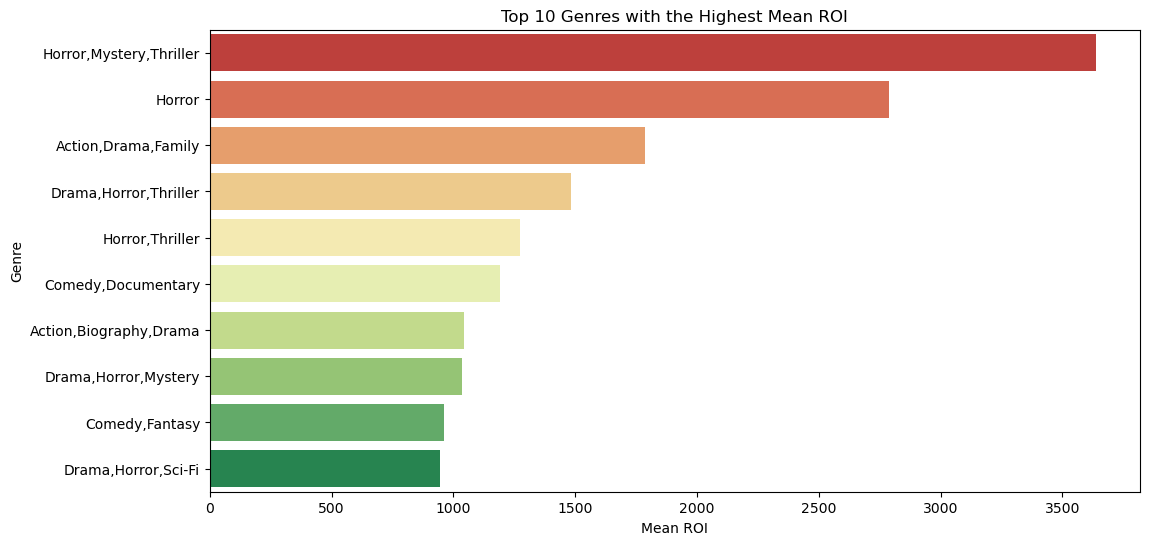

In [54]:
# Create bar plot to visualize top 10 genres with the highest mean ROI

plt.figure(figsize=(12, 6))
sns.barplot(x='ROI', y='genres', data=genres_roi.head(10), palette='RdYlGn')
plt.xlabel('Mean ROI')
plt.ylabel('Genre')
plt.title('Top 10 Genres with the Highest Mean ROI')
plt.show()

#### Inference: The top 3 genres in terms of ROI are:

1. Horror, Mystery, Thriller
2. Horror
3. Action, Drama, Family

### Question 2: What is the best day and month for movie release to maximize box office revenue and audience reception?

### I. Best Day to Release Movie

In [55]:
# what is the best day to release movies in terms of worldwide gross 
# group movies by release day and calculate the mean worldwide gross for each day

mean_gross_by_day = combined_df2.groupby('release_day')['worldwide_gross'].mean()
mean_gross_by_day

release_day
Friday        171089351.36488
Monday             55936000.0
Saturday          237400000.0
Sunday       159366666.666667
Thursday     372346666.666667
Tuesday           223462500.0
Wednesday    204114852.911765
Name: worldwide_gross, dtype: Float64

In [56]:
# reorder the days for better readability

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

mean_gross_by_day = mean_gross_by_day.reindex(day_order)


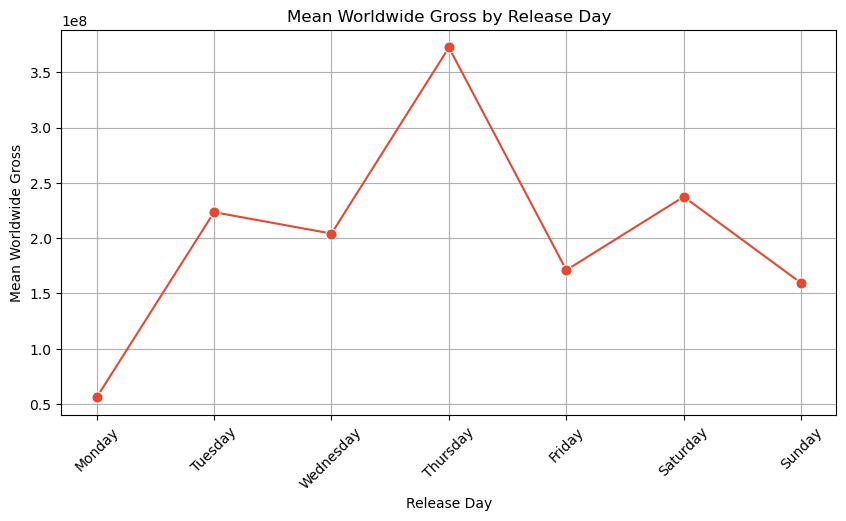

In [57]:
# create a plot to visualize the mean worldwide gross by release day

plt.figure(figsize=(10, 5))
sns.set_palette('RdYlGn')
sns.lineplot(x=mean_gross_by_day.index, y=mean_gross_by_day.values, marker='o', markersize=8)
plt.title('Mean Worldwide Gross by Release Day')
plt.xlabel('Release Day')
plt.ylabel('Mean Worldwide Gross')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

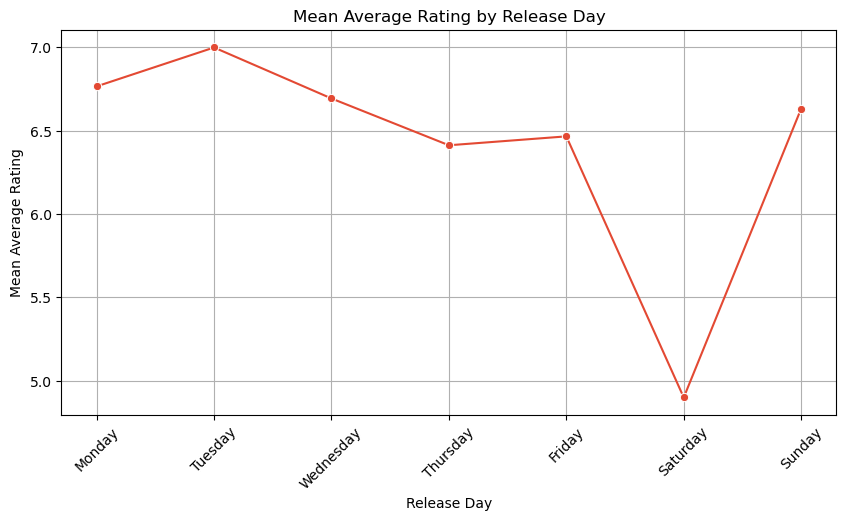

In [58]:
# what is the best day to release movies in terms of average rating 
# grouping movies by release day and calculating the mean average rating for each day

mean_rating_by_day = combined_df2.groupby('release_day')['averagerating'].mean()

# reorder days 

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_rating_by_day = mean_rating_by_day.reindex(day_order)

# creating plot to visualize the mean average rating by release day

plt.figure(figsize=(10, 5))
sns.set_palette("RdYlGn")
sns.lineplot(x=mean_rating_by_day.index, y=mean_rating_by_day.values, marker='o', markersize=6)
plt.title('Mean Average Rating by Release Day')
plt.xlabel('Release Day')
plt.ylabel('Mean Average Rating') 
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


#### Conclusion: Most favourable movie release days:

1. Thursday - in terms of ROI
2. Tuesday - in terms of popularity

### II. Best Month to Release Movie

In [59]:
# what is the best month to release movies in terms of worldwide gross 
# grouping movies by month and calculating the mean worldwide gross for each month

mean_gross_by_month = combined_df2.groupby('month')['worldwide_gross'].mean()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mean_gross_by_month = mean_gross_by_month.reindex(month_order)

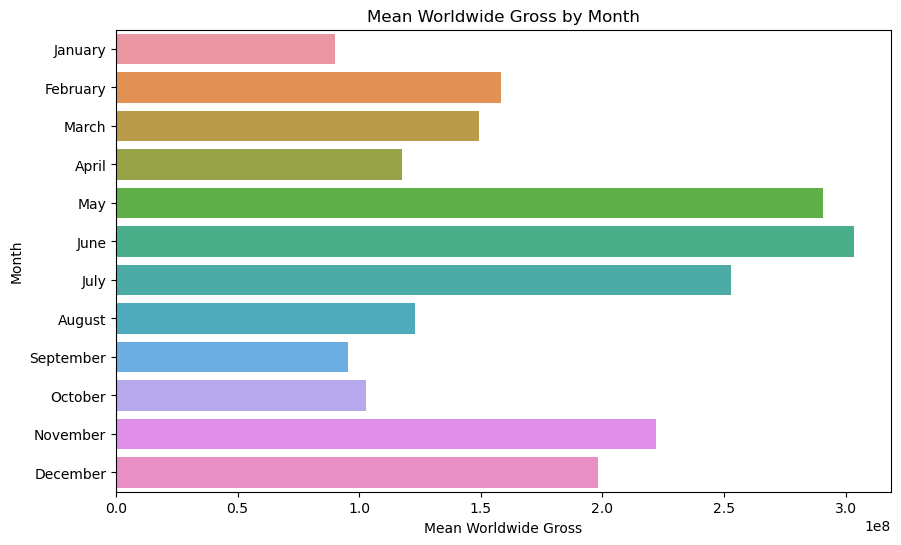

In [60]:
# Create plot to visualize the mean worldwide gross by month

plt.figure(figsize=(10, 6))
sns.set_palette("RdYlGn")
sns.barplot(x=mean_gross_by_month.values, y=mean_gross_by_month.index)
plt.title('Mean Worldwide Gross by Month')
plt.xlabel('Mean Worldwide Gross')
plt.ylabel('Month')

plt.show()

In [61]:
# what is the best month to release movies in terms of average rating
# grouping movies by month and calculating the mean average rating for each month

mean_rating_by_month = combined_df2.groupby('month')['averagerating'].mean()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mean_rating_by_month = mean_rating_by_month.reindex(month_order)

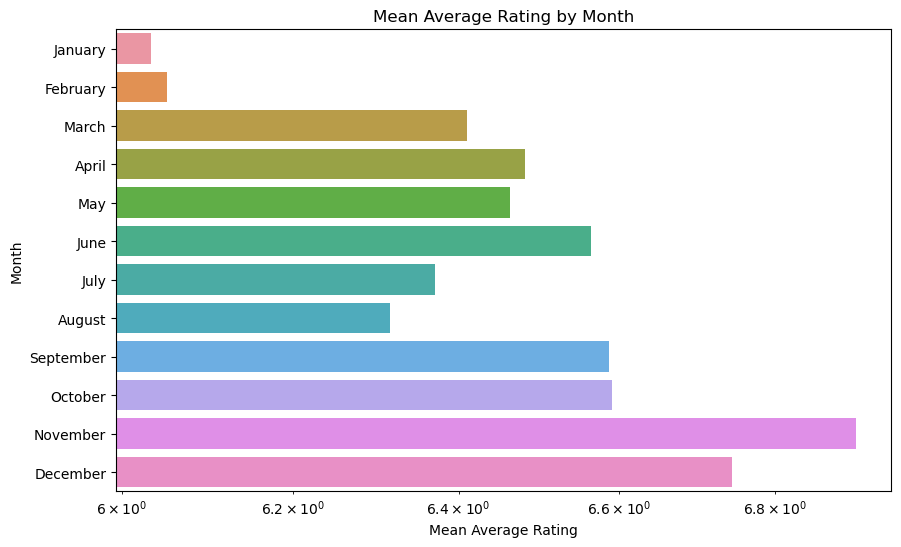

In [62]:
# creating plot to visualize the mean worldwide gross by month

plt.figure(figsize=(10, 6))
sns.set_palette("RdYlGn")
sns.barplot(x=mean_rating_by_month.values, y=mean_rating_by_month.index)
plt.title('Mean Average Rating by Month')
plt.xlabel('Mean Average Rating')
plt.ylabel('Month')
plt.xscale('log')  

plt.show()

#### Inference: Most favourable movie release months:

1. May, June, July - in terms of ROI
2. November, December - in terms of popularity

### Question 3: Is there a significant correlation between production budget and worldwide gross revenue for movies?

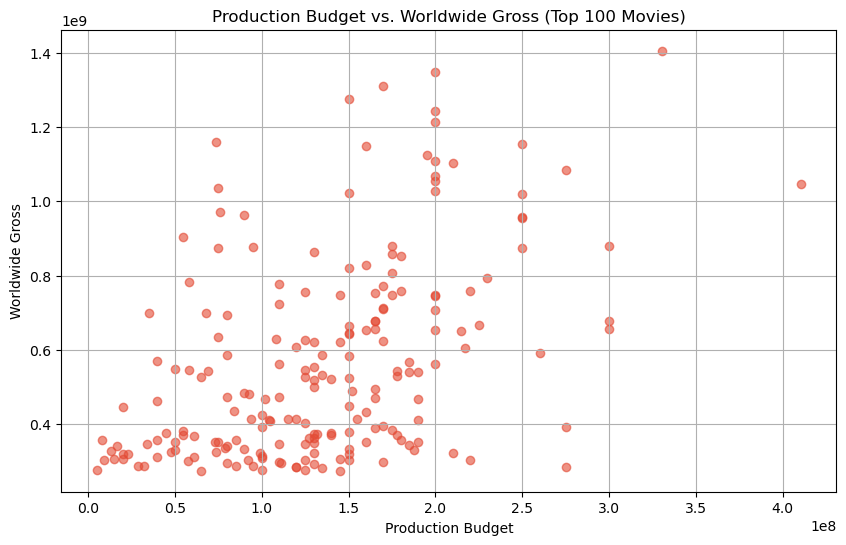

In [63]:
# Create a scatter plot to visualize how production budget and worldwide gross are related
# Sort the DataFrame by 'worldwide_gross' in descending order

combined_df2_sorted = combined_df2.sort_values(by='worldwide_gross', ascending=False)

# Select the top 100 movies
top_100_movies = combined_df2_sorted.head(200)

plt.figure(figsize=(10, 6))
plt.scatter(top_100_movies['production_budget'], top_100_movies['worldwide_gross'], alpha=0.6)
plt.title('Production Budget vs. Worldwide Gross (Top 100 Movies)')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)

plt.show()

#### Inference: Relationship between production budget & revenue:

There’s a positive correlation between production budget and worldwide gross for the top 100 movies


## Evaluation

***
1.	The analysis indicates that the 'Horror, Mystery, Thriller' genre has the highest ROI making it a potential choice   for Microsoft's movie studio

2.	The data also suggests that movies released during the spring/summer months - May, June & July tend to have higher   box office revenues while November has highest rated movies

3.	The correlation analysis and scatter plot revealed a statistically positive correlation between production budget   and worldwide gross revenue, indicating that investing in higher-budget films can lead to increased revenue

These insights can be used by Microsoft's new movie studio to make data-driven decisions about the genres of films  to create, the timing of releases and budget allocation. Microsoft can increase its chances of success in the highly competitive movie industry by following these recommendations.
***



## Conclusion

***
This analysis has provided insights into the types of films that are currently performing well at the box office as well as the optimal timing for movie releases and the relationship between budget and revenue. These findings are a strong foundation for Microsoft's new movie studio to make informed decisions about their film production strategies.

However, in order enhance the quality of the recommendations herein, I suggest exploring additional data sources and conducting further analysis in various other areas including but not limited to:

1. Streaming and Home Entertainment Revenue: With the growing importance of streaming platforms such as Netflix, including data on revenue from digital and streaming services, can provide a more comprehensive picture of a film's overall financial performance.

2. Marketing and Promotion: Examining data related to marketing and promotional strategies employed by successful movies can help Microsoft understand how to effectively market their films

3. Impact of Cast on Movie Performance. This analysis can help identify talent with a strong track record of contributing to successful films 
***